<h3> Feature Matching </h3>
<ol>
    <li>Brute Force using ORB descriptors</li>
    <li>Brute Force using SIFT(Scale Invariant Feature transform) descriptors and Ratio test </li>
    <li>FLANN Based Matcher</li>
</ol>

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

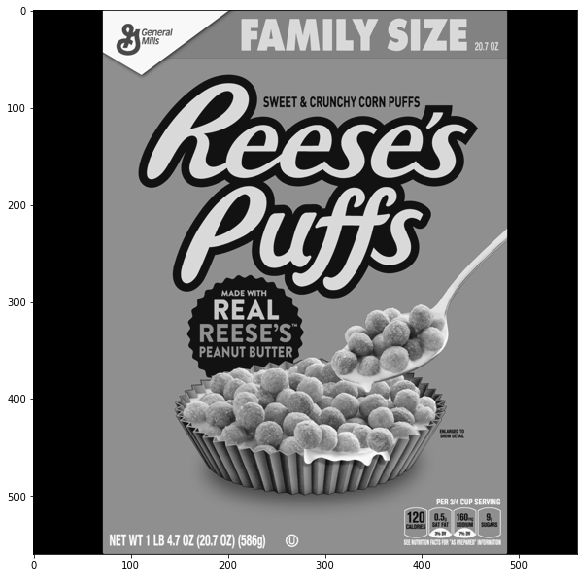

In [6]:
# image to be matched
reeses = cv.imread('DATA/reeses_puffs.png',0)
display(reeses)

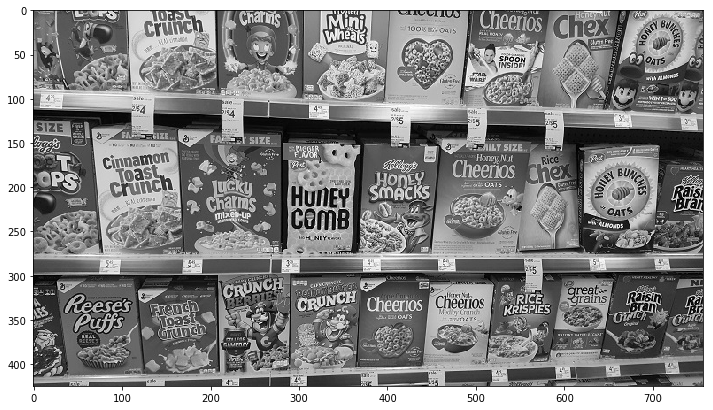

In [7]:
# image in which reeses is to be searched
cereals = cv.imread('DATA/many_cereals.jpg',0)
display(cereals)

In [8]:
# creating an ORB detector object
orb = cv.ORB_create()

In [9]:
# find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [10]:
# create a matching object
# default parameters
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)

In [11]:
matches = bf.match(des1, des2)

In [12]:
# matches is a list of match objects which have many attributes and one of them is
# distance: the less the distance is, more of a match that is
# we'll sort this matches objects according to distance attributes and see the best attributes
matches = sorted(matches, key = lambda x: x.distance)

In [13]:
# draw only first 25 matches
reesesMatches = cv.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags = 2)

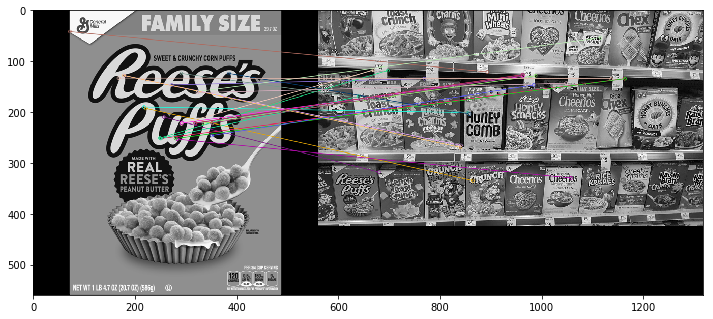

In [14]:
# performs poorly
display(reesesMatches)

<h3> 2. Brute force using SIFT detector and ratio test </h3>

In [15]:
# create a SIFT detector object
sift = cv.xfeatures2d.SIFT_create()

In [17]:
# detect and compute keypoints and descriptors
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [18]:
# create a brute force object
bf = cv.BFMatcher()

In [20]:
# Use Knn match to match 'k' number of keypoints for 1
matches = bf.knnMatch(des1, des2, k = 2)

<ul>
<li>Now matches contains list of pairs of matches for each keypoint like <b><i>[ [ match1, match2 ] ,... ]</i></b></li>
<li>we are going to check for each pair : distance of both matches like <b><i>[ match1 . dist, match2 . dist ]</i></b></li>
<li>if the distance between the 2 macthes is small then its probably due to noise 
    so we will drop those matches like <b><i> match1 . distance &GT; 75% of match2 . distance </i></b></li>
<li>however if the distance attribute of the pair is distant then we'll keep the best match 
    of the 2 which is the first 1 </li>
</ul>


In [23]:
# we'll create a new list of good matches
good = []

for m1, m2 in matches:
    
    if m1.distance < 0.75 * m2.distance:
        
        good.append([m1])

In [25]:
print("Matches length = ",len(matches),"\nGood matches length = ",len(good))

Matches length =  1500 
Good matches length =  78


In [30]:
# draw the matches 
siftMatches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags = 2)

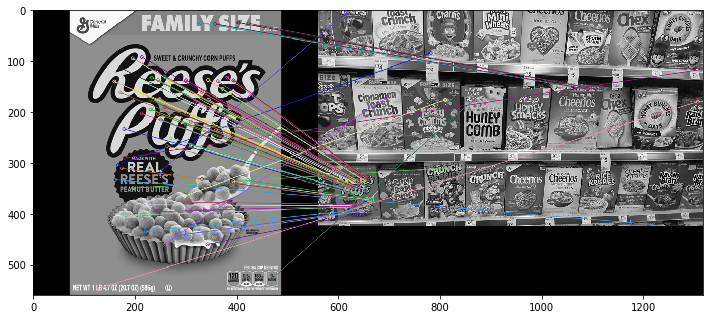

In [31]:
display(siftMatches)

<h3> FLANN Based Matching </h3>
(Fast library for approximate nearest neighbour) <br>
Performs Faster than Brute force matcher 

In [32]:
sift = cv.xfeatures2d.SIFT_create()

In [33]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [34]:
# FLANN 
# Default parameters
FLAN_INDEX_KTREE = 0
indexParams = dict(algorithm=FLAN_INDEX_KTREE, trees = 5)
searchParams = dict(checks = 50)

In [35]:
flann = cv.FlannBasedMatcher(indexParams, searchParams)

In [36]:
matches = flann.knnMatch(des1, des2, k = 2)

In [38]:
# repeat procedure used for SIFT based matching
good = []

for m1, m2 in matches:
    if m1.distance < 0.75*m2.distance:
        good.append([m1])

In [39]:
flannMatches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags = 2)

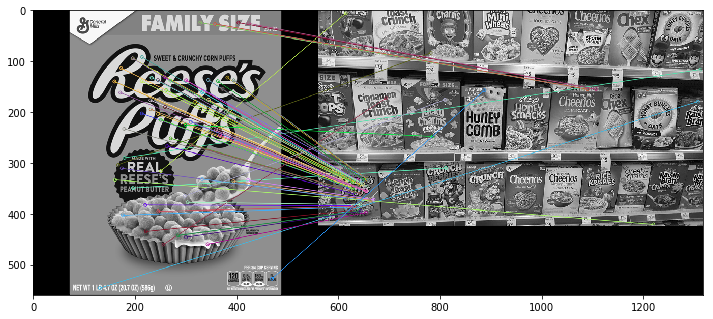

In [40]:
display(flannMatches)

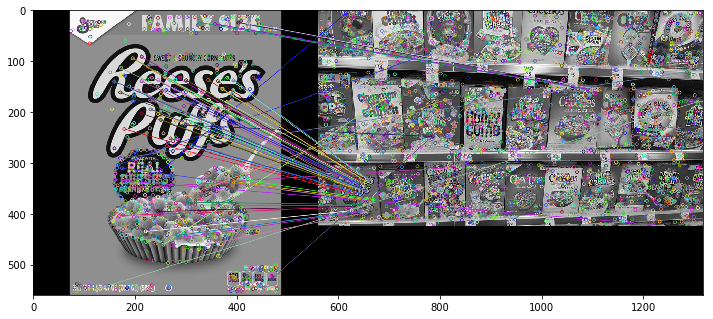

In [41]:
# show all keypoints
flannMatches2 = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags = 0)
display(flannMatches2)

In [54]:
# We can also use custom colors to draw these lines and dots
sift = cv.xfeatures2d.SIFT_create()

In [55]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [56]:
FLAN_INDEX_KTREE = 0
indexParams = dict(algorithm=FLAN_INDEX_KTREE, trees = 5)
searchParams = dict(checks = 50)
flan = cv.FlannBasedMatcher(indexParams, searchParams)

In [57]:
matches = flan.knnMatch(des1, des2, k=2)

In [58]:
# create a matches mask
matches_mask = [[0,0] for i in range(len(matches))]

In [59]:
for i, (m1, m2) in enumerate(matches):
    if m1.distance < 0.75 * m2.distance:
        matches_mask[i] = [1,0]

In [61]:
drawParams = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0),
                  matchesMask = matches_mask,
                  flags = 0)

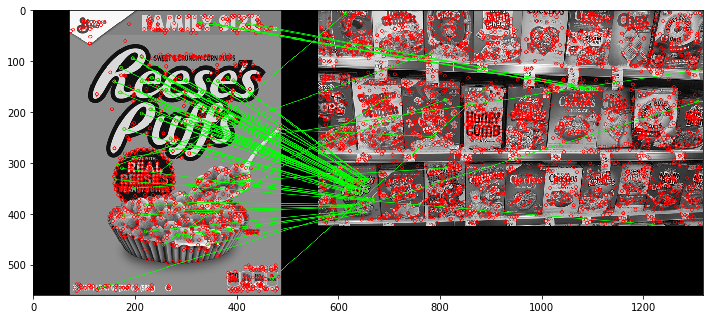

In [62]:
flannMatches = cv.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **drawParams )
display(flannMatches)